In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/titanic.csv')

In [3]:
X = df
y = df['Survived']

In [4]:
unseen = pd.read_csv('../data/unseen.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

# Missing Values

In [6]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         2
dtype: int64

In [7]:
X_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             40
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          135
Embarked         0
dtype: int64

<Axes: xlabel='Age'>

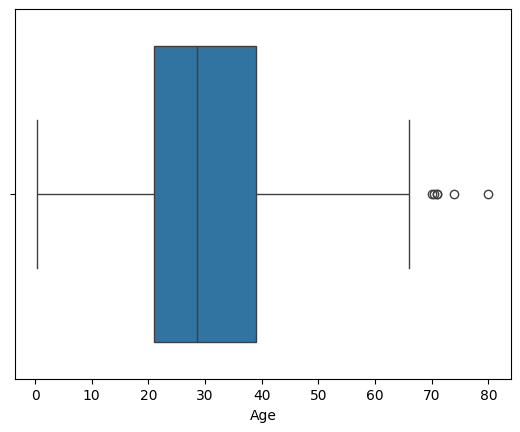

In [8]:
sns.boxplot(x=X_train['Age'])

<Axes: xlabel='Age'>

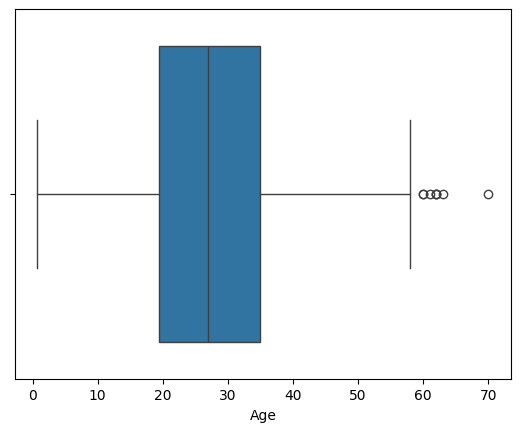

In [9]:
sns.boxplot(x=X_test['Age'])

<Axes: xlabel='Fare'>

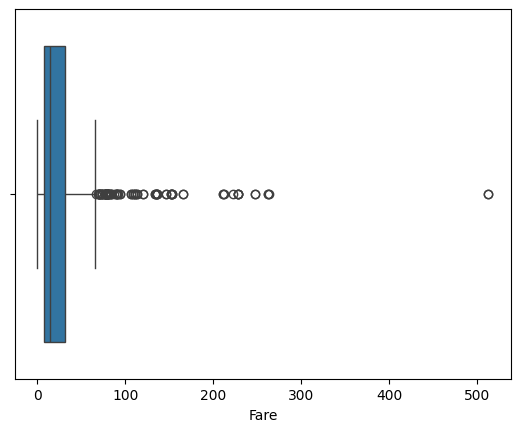

In [10]:
sns.boxplot(x=X_train['Fare'])

<Axes: xlabel='Fare'>

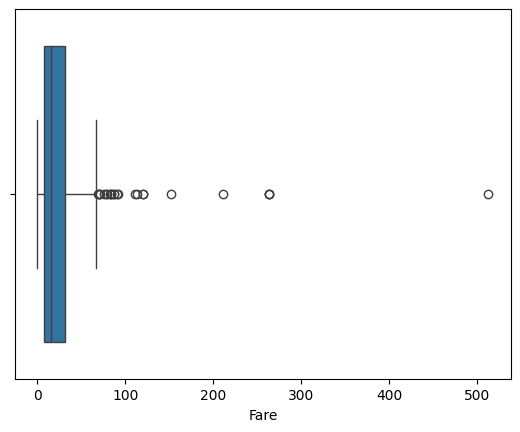

In [11]:
sns.boxplot(x=X_test['Fare'])

In [12]:
import sys
sys.path.append("../src")

from preprocessing import fill_missing_values

In [13]:
X_train = fill_missing_values(X_train)
X_test = fill_missing_values(X_test)
unseen = fill_missing_values(unseen)

c:\Users\66959\Desktop\data_sci_project\titanic-survival-ml\notebooks\../src\preprocessing.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
c:\Users\66959\Desktop\data_sci_project\titanic-survival-ml\notebooks\../src\preprocessing.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

# Outliers

<Axes: xlabel='Age'>

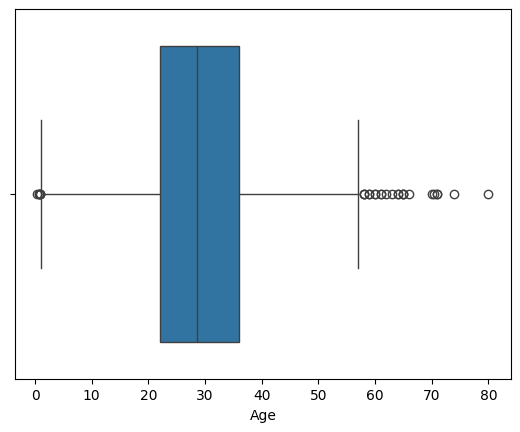

In [14]:
sns.boxplot(x=X_train['Age'])

<Axes: xlabel='Age'>

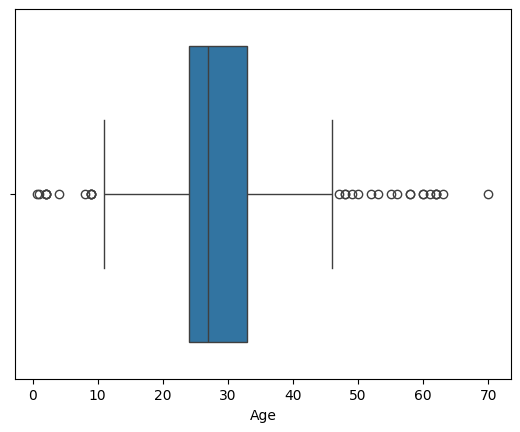

In [15]:
sns.boxplot(x=X_test['Age'])

In [16]:
from preprocessing import remove_outlier

In [17]:
X_train = remove_outlier(X_train, 'Fare')
X_train = remove_outlier(X_train, 'Age')
X_test = remove_outlier(X_test, 'Fare')
X_test = remove_outlier(X_test, 'Age')

<Axes: xlabel='Fare'>

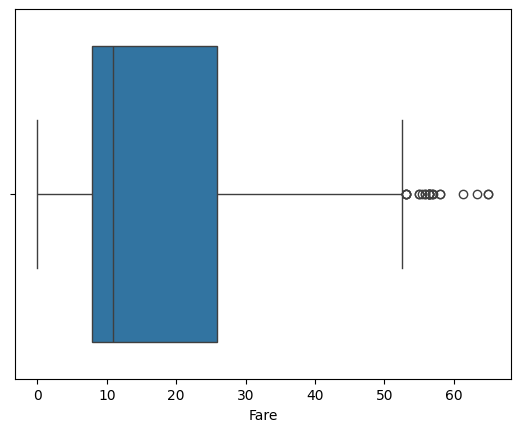

In [18]:
sns.boxplot(x=X_train['Fare'])

<Axes: xlabel='Fare'>

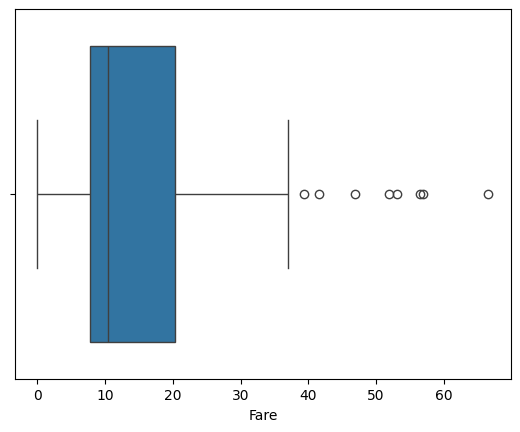

In [19]:
sns.boxplot(x=X_test['Fare'])

<Axes: xlabel='Age'>

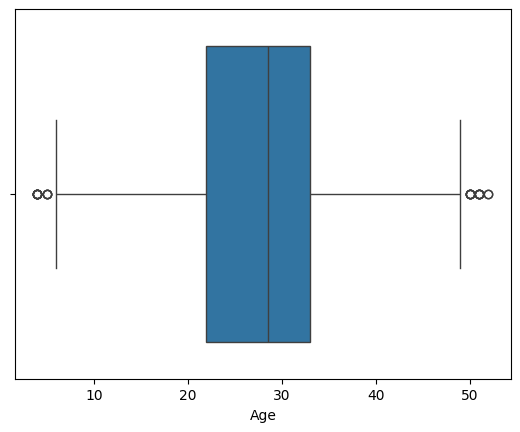

In [20]:
sns.boxplot(x=X_train['Age'])

<Axes: xlabel='Age'>

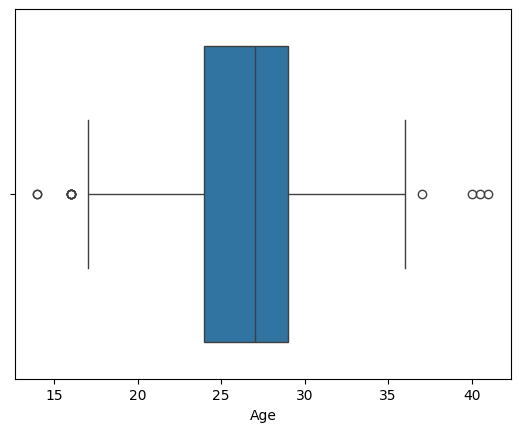

In [21]:
sns.boxplot(x=X_test['Age'])

In [22]:
X_train.to_csv('../data/cleaned_X_train.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
X_test.to_csv('../data/cleaned_X_test.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)